<a href="https://colab.research.google.com/github/Ishita2502/DecisionTree-RF/blob/main/Golf_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path='/gdrive/My Drive/Online MLCC : Oct 2021/Data/Classwork/'

In [ ]:
data=pd.read_csv(path+'golf_weather.csv')

In [ ]:
data.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [ ]:
data.shape

(14, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder

outlook_encoder=LabelEncoder()
data['OUTLOOK']=outlook_encoder.fit_transform(data['OUTLOOK'])

temperature_encoder=LabelEncoder()
data["TEMPERATURE"]=temperature_encoder.fit_transform(data["TEMPERATURE"])

humidity_encoder=LabelEncoder()
data["HUMIDITY"]=humidity_encoder.fit_transform(data["HUMIDITY"])

windy_encoder=LabelEncoder()
data["WINDY"]=windy_encoder.fit_transform(data["WINDY"])

golf_encoder=LabelEncoder()
data["PLAY GOLF"]=golf_encoder.fit_transform(data["PLAY GOLF"])

In [ ]:
data.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()

In [ ]:
output = data['PLAY GOLF']
input_feature=data.drop(columns=['PLAY GOLF'])

In [ ]:
dtree.fit(input_feature, output)

DecisionTreeClassifier()

In [ ]:
label = golf_encoder.classes_
features =  input_feature.columns
features

Index(['OUTLOOK', 'TEMPERATURE', 'HUMIDITY', 'WINDY'], dtype='object')

In [ ]:
label

array(['No', 'Yes'], dtype=object)

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
from pydotplus import graphviz as gr

# Export the image to a dot file
export_graphviz(dtree, out_file ='dtree.dot',feature_names=features,class_names=label,rounded=True,precision=4,filled=True)
# Use dot file to create a graph
graph = gr.graph_from_dot_file('dtree.dot')

# Write graph to a png file
graph.write_png('tree.png')

True

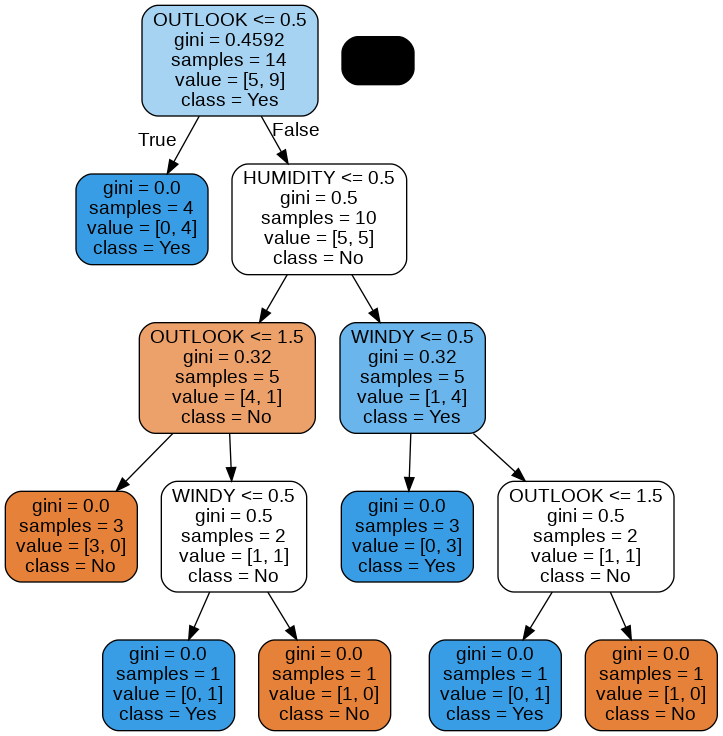

In [ ]:
from PIL import Image
from IPython.display import display

im = Image.open('tree.png')
display(im)

PRUNING

In [ ]:
cancer=pd.read_csv(path+'breast_cancer_wisconsin_data.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
tumor_encoder=LabelEncoder()
cancer['diagnosis']=tumor_encoder.fit_transform(cancer['diagnosis'])
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
cancer_input=cancer.drop(columns=['id','diagnosis','Unnamed: 32'])
cancer_input.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cancer.shape


(569, 33)

In [ ]:
cancer_input.shape

(569, 30)

In [ ]:
cancer_y=cancer['diagnosis']
cancer_y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(cancer_input,cancer_y,test_size=0.25,random_state=2)

In [ ]:
cancer_tree=DecisionTreeClassifier()

In [ ]:
cancer_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
lab = tumor_encoder.classes_
features =  cancer_input.columns
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
lab

array(['B', 'M'], dtype=object)

In [ ]:
# Export the image to a dot file
export_graphviz(cancer_tree, out_file ='ctree.dot',feature_names=features,class_names=lab,rounded=True,precision=4,filled=True)
# Use dot file to create a graph
graph = gr.graph_from_dot_file('ctree.dot')

# Write graph to a png file
graph.write_png('can.png')

True

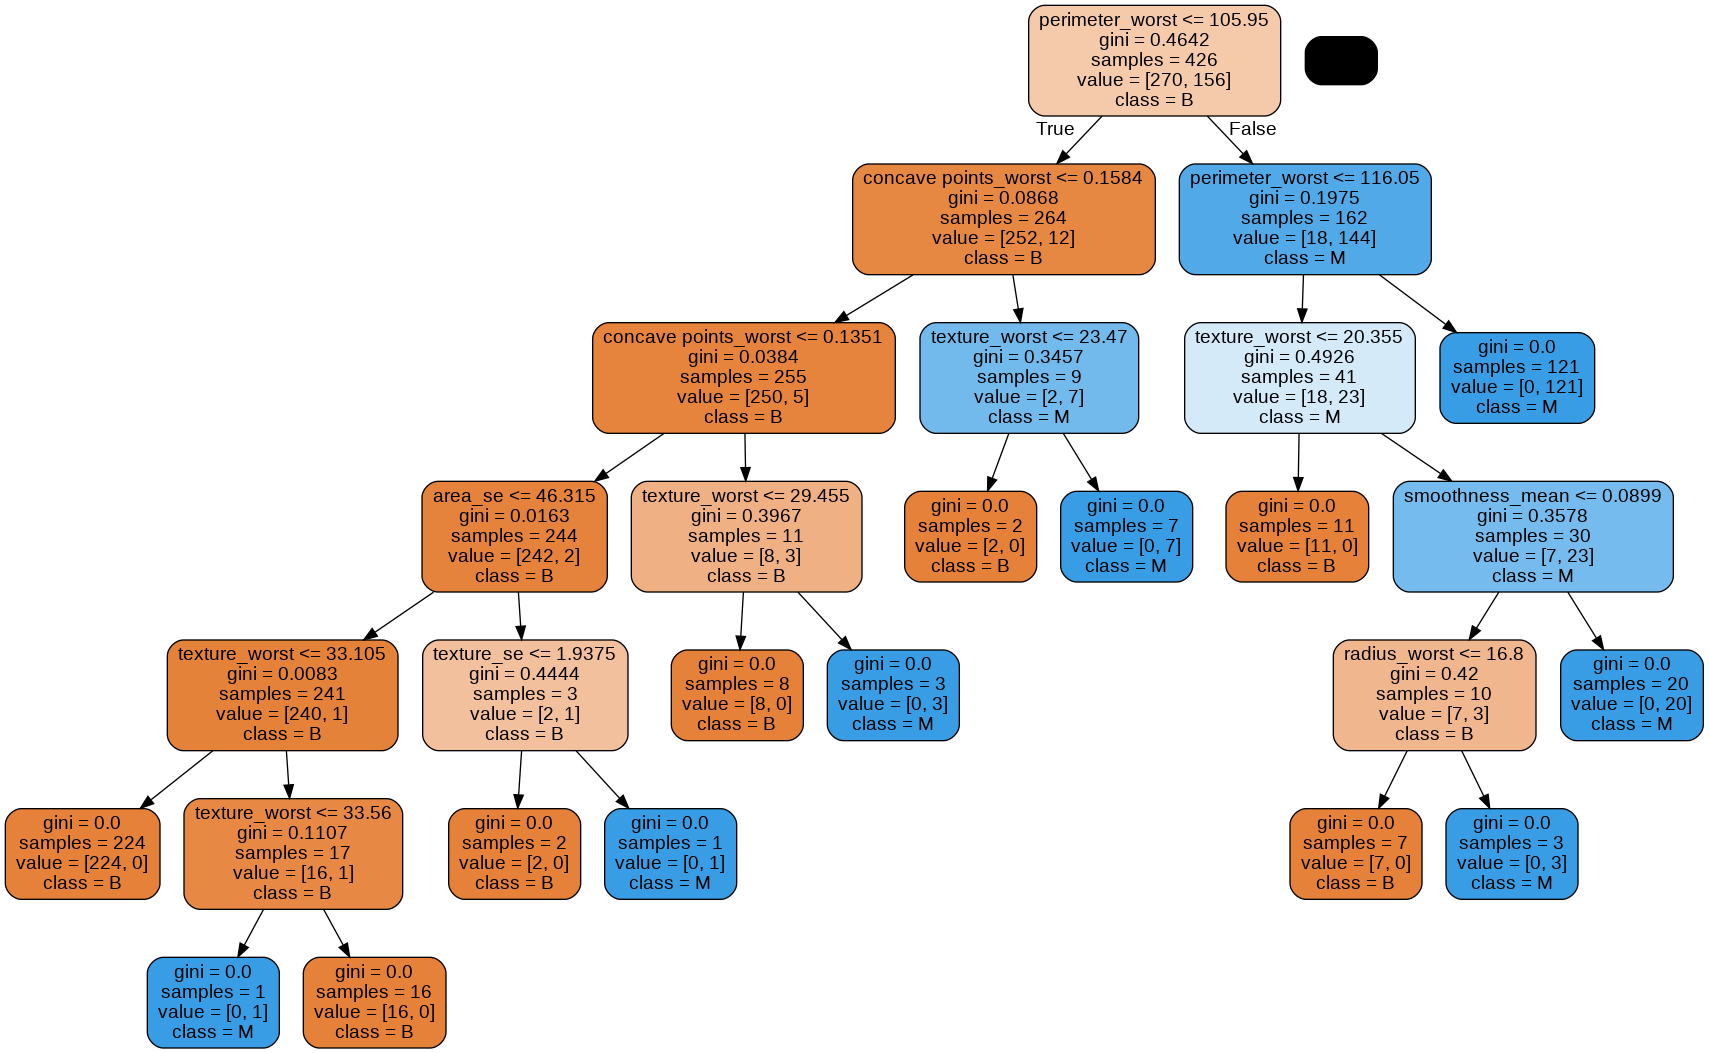

In [ ]:
im = Image.open('can.png')
display(im)

In [ ]:
cancer_tree.tree_.node_count

27

In [ ]:
cancer_tree.get_n_leaves()

14

In [ ]:
cancer_tree.get_depth()

6

In [ ]:
ypred_train=cancer_tree.predict(X_train)
ypred_test=cancer_tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
training_accuracy = accuracy_score(y_train,ypred_train)
test_accuracy = accuracy_score(y_test,ypred_test)

In [ ]:
print('Training Accuracy = {} %'.format(training_accuracy*100))
print('Test Accuracy = {} %'.format(test_accuracy*100))

Training Accuracy = 100.0 %
Test Accuracy = 93.7062937062937 %


In [ ]:
#Training accuracy v high, test accuracy low, model tailor made for training data, need to prune to avoid overfit

In [ ]:
prune_path=cancer_tree.cost_complexity_pruning_path(X_train,y_train)
prune_path

{'ccp_alphas': array([0.        , 0.00232818, 0.0068506 , 0.00730308, 0.00985915,
        0.01533646, 0.02221077, 0.02346023, 0.02771098, 0.33529903]),
 'impurities': array([0.        , 0.00931271, 0.0230139 , 0.03031698, 0.04017613,
        0.0555126 , 0.07772337, 0.1011836 , 0.12889458, 0.46419361])}

In [ ]:
alphas=prune_path.ccp_alphas
print(alphas)

[0.         0.00232818 0.0068506  0.00730308 0.00985915 0.01533646
 0.02221077 0.02346023 0.02771098 0.33529903]


In [ ]:
impurities=prune_path.impurities
print(impurities)

[0.         0.00931271 0.0230139  0.03031698 0.04017613 0.0555126
 0.07772337 0.1011836  0.12889458 0.46419361]


In [ ]:
new_cancer_trees=[]

for alpha in alphas:
  new_cancer_tree= DecisionTreeClassifier(ccp_alpha=alpha)
  new_cancer_tree.fit(X_train,y_train)

  new_cancer_trees.append(new_cancer_tree)

In [ ]:
len(new_cancer_trees)

10

In [ ]:
train_scores=[accuracy_score(y_train,new_cancer_tree.predict(X_train)) for new_cancer_tree in new_cancer_trees]

In [ ]:
print(train_scores)

[1.0, 0.9953051643192489, 0.9882629107981221, 0.9835680751173709, 0.9765258215962441, 0.9671361502347418, 0.9413145539906104, 0.9295774647887324, 0.9295774647887324, 0.6338028169014085]


In [ ]:
test_scores=[accuracy_score(y_test,new_cancer_tree.predict(X_test)) for new_cancer_tree in new_cancer_trees]

In [ ]:
print(test_scores)

[0.9230769230769231, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9230769230769231, 0.9020979020979021, 0.8881118881118881, 0.8881118881118881, 0.6083916083916084]


In [ ]:
print('max test_score= {}'.format(max(test_scores)))
print('position of max score= {}'.format(np.argmax(test_scores)))

max test_score= 0.9440559440559441
position of max score= 1


In [ ]:
pruned_cancer_tree= DecisionTreeClassifier(ccp_alpha=alphas[4])
pruned_cancer_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.009859154929577466)

In [ ]:
new_ypred_train=pruned_cancer_tree.predict(X_train)
new_ypred_test=pruned_cancer_tree.predict(X_test)

In [ ]:
training_accuracy=accuracy_score(new_ypred_train,y_train)
test_accuracy=accuracy_score(new_ypred_test,y_test)

In [ ]:
print('Training Accuracy = {} %'.format(training_accuracy*100))
print('Test Accuracy = {} %'.format(test_accuracy*100))

Training Accuracy = 97.65258215962442 %
Test Accuracy = 94.4055944055944 %


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
rf_pred=rf.predict(X_test)
rf_test_accuracy=accuracy_score(rf_pred,y_test)
print('Test Accuracy = {} %'.format(rf_test_accuracy*100))

Test Accuracy = 94.4055944055944 %
